# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Lets Complete the EDA with Visualization


In this Notebook, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, we will perform Exploratory Data Analysis and Feature Engineering.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [23]:
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn
!pip3 install matplotlib

We will import the following libraries the lab 



In [24]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [25]:
import requests
import pandas as pd
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(url, verify=False)
df = pd.read_csv(StringIO(response.text))

#df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
#df.head(5)

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


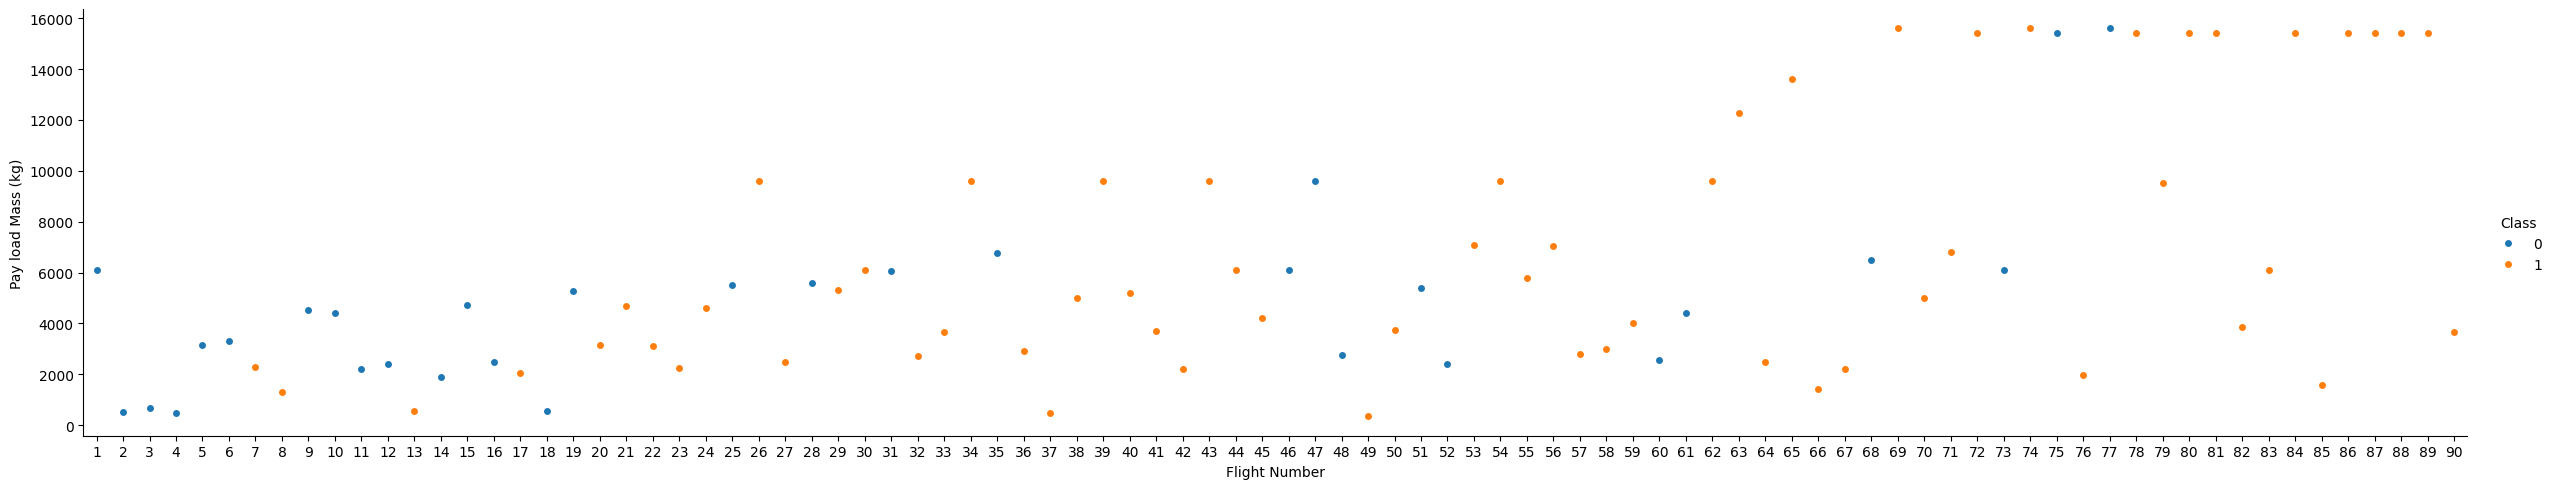

In [26]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number")
plt.ylabel("Pay load Mass (kg)")
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function catplot to plot FlightNumber vs LaunchSite, set the  parameter x  parameter to FlightNumber,set the  y to Launch Site and set the parameter hue to 'class'


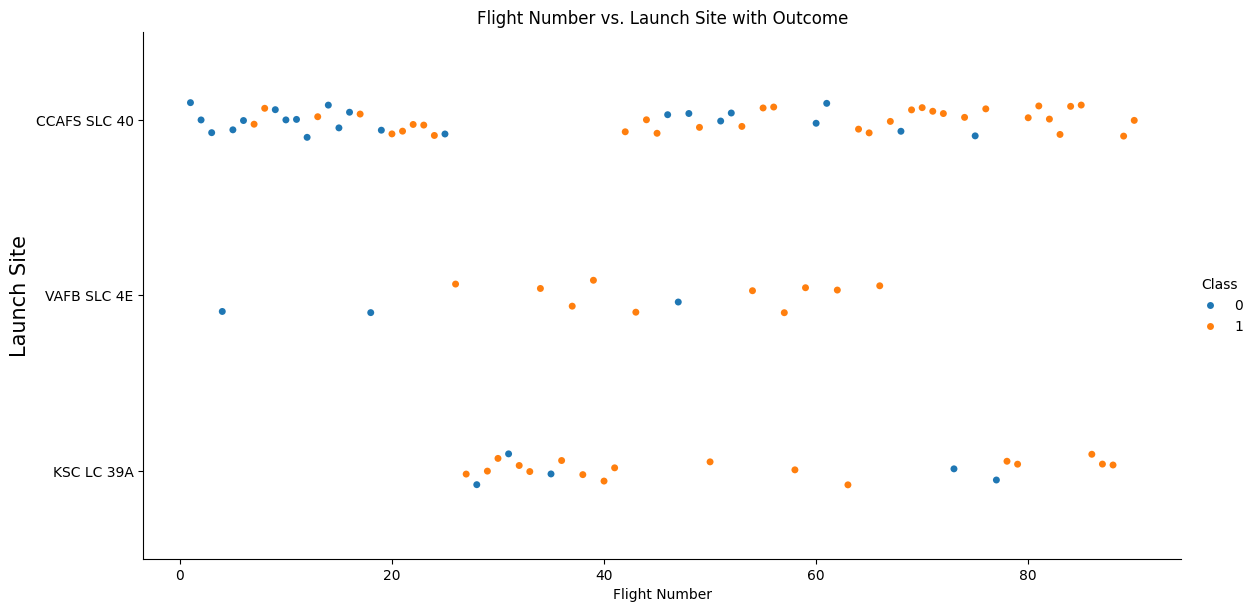

In [27]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Flight Number vs. Launch Site, hue by Class
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    height=6,
    aspect=2
)
plt.xlabel("Flight Number", )
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs. Launch Site with Outcome")
plt.show()


### TASK 2: Visualize the relationship between Payload and Launch Site


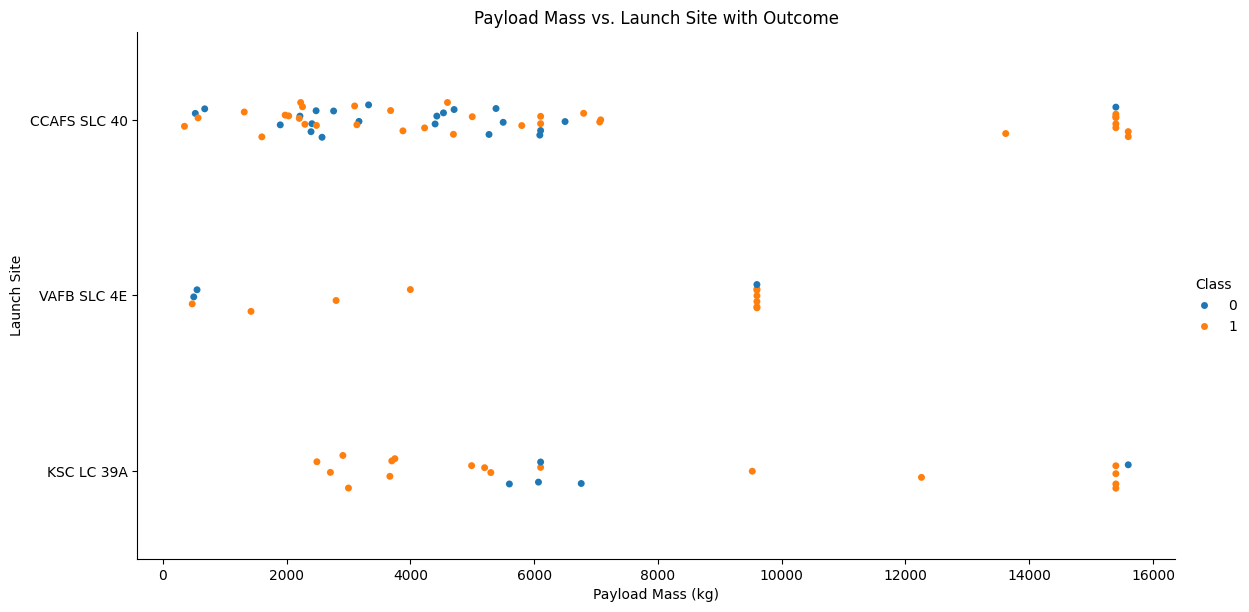

In [28]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value. Plot Payload Mass vs. Launch Site, hue by Class
sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    height=6,
    aspect=2
)
plt.xlabel("Payload Mass (kg)", )
plt.ylabel("Launch Site", )
plt.title("Payload Mass vs. Launch Site with Outcome")
plt.show()


Now if we observe Payload Vs. Launch Site scatter point chart we will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a bar chart for the sucess rate of each orbit


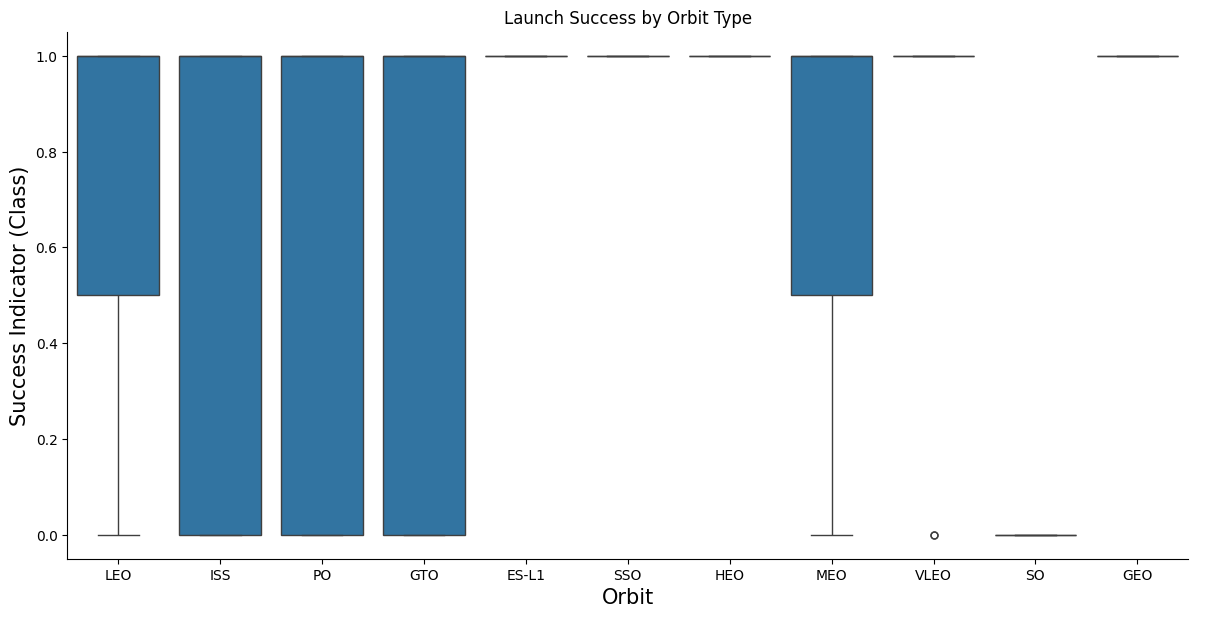

In [29]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Plot Orbit vs. Class, hue by Class
sns.catplot(
    x="Orbit",
    y="Class",
    data=df,
    height=6,
    aspect=2,
    kind="box"
)
plt.xlabel("Orbit", fontsize=15)
plt.ylabel("Success Indicator (Class)", fontsize=15)
plt.title("Launch Success by Orbit Type")
plt.show()


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


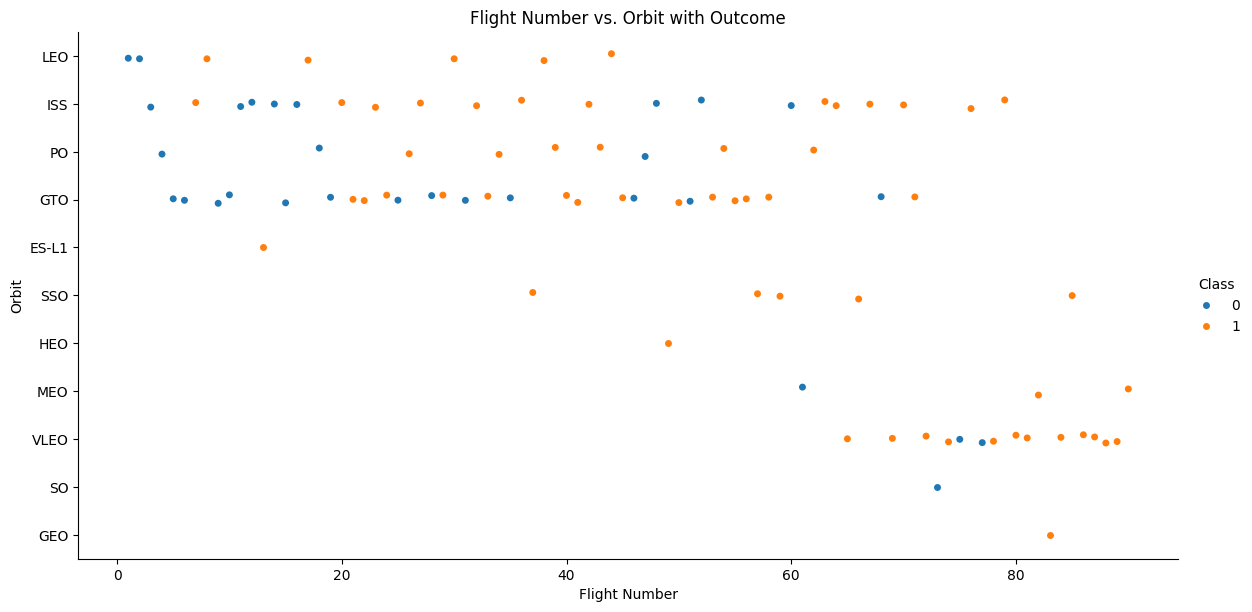

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Plot Flight Number vs. Orbit, hue by Class
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    height=6,
    aspect=2
)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Flight Number vs. Orbit with Outcome")
plt.show()


we should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


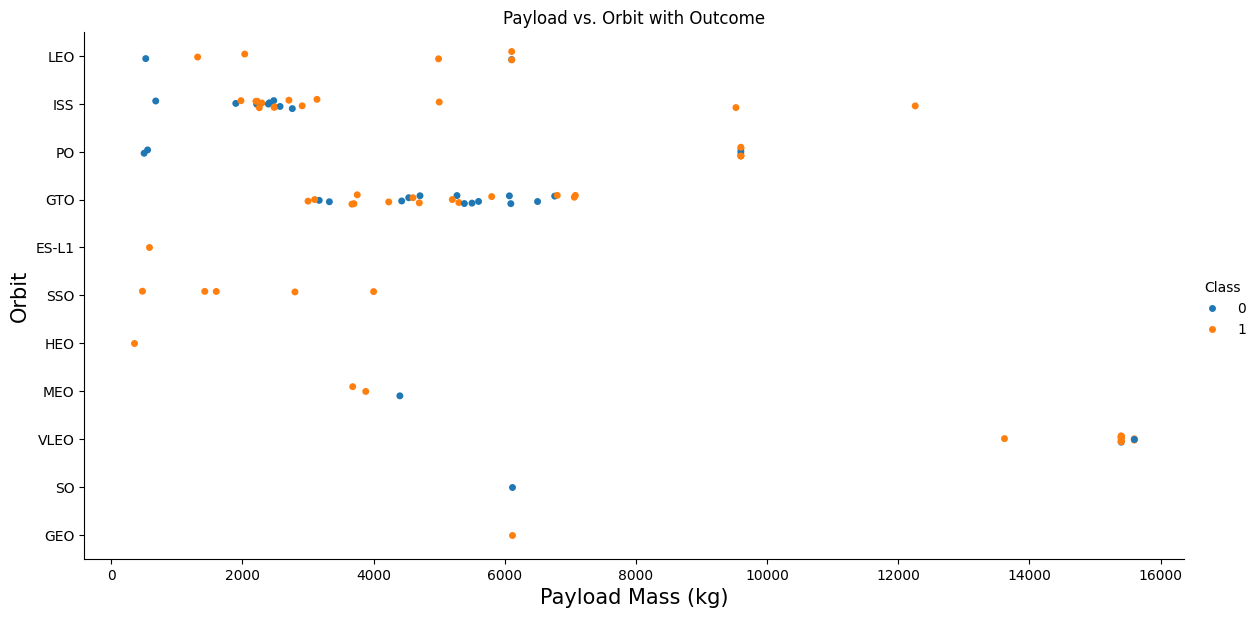

In [31]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Plot Payload Mass vs. Orbit, hue by Class
sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    height=6,
    aspect=2
)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Payload vs. Orbit with Outcome")
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


we can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.


The function will help we get the year from the date:


In [32]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Date'] = year
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


we can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


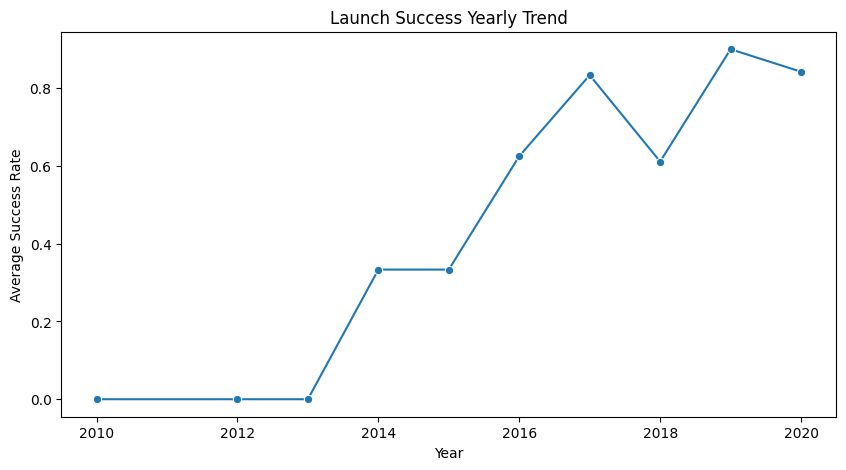

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['Year'] = pd.DatetimeIndex(df['Date']).year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_success, x='Year', y='Class', marker='o')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.show()


## Features Engineering 


In [34]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [35]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64


In [36]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)